Titanic Kaggle 

In [1]:
import pandas as pd
datos = pd.read_csv("train.csv")


In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

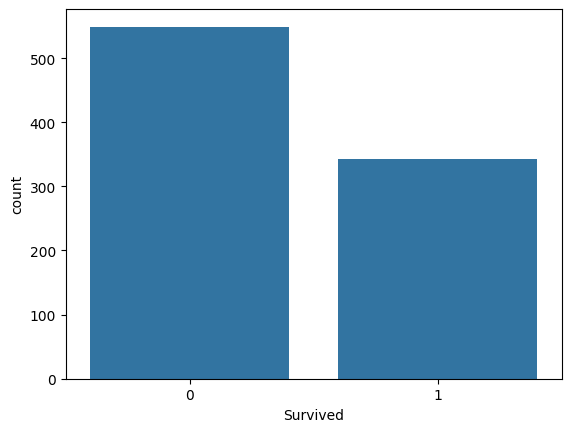

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

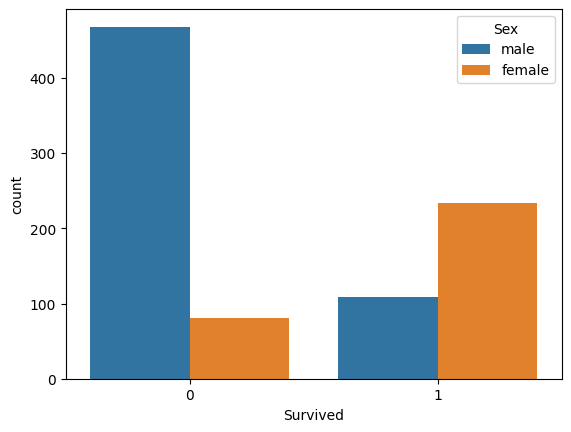

In [5]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [6]:
#para visualizar los datos que estan vacios = .isna y se agrega .sum() para que suma el total de datos vacios 
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

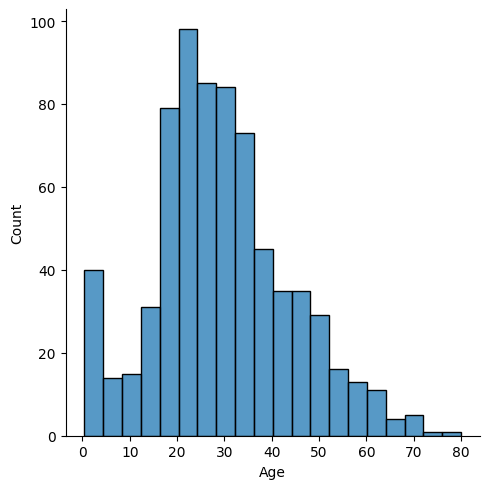

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
# promedio
datos["Age"].mean()

29.69911764705882

In [10]:
#para asignar un valor o un tipo de dato a los campos vaios .fill
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
# es neccesario igualar a ero para que nuestra listta de datos se atualice 
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [12]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
#esto nos da el total de casillas sin datos 
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Los datos cabin no son relevantes ya que cuena con mucvhas casillas vacias y las existentes son muy variadas 
#por tanto se elimianan con .drop especicicando la columna a eliminar y señalando axis=1 porque es una columan 
datos = datos.drop(["Cabin"], axis=1)

In [15]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
# ya que las casillas que quedan sin valor son pocass y no representan una suma significatica
#simplemente se eliminan
datos = datos.dropna()

In [17]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [19]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# ahora necesitamos cambiar la columna del sexo a un valor numerico
# dtype=int para cambiar el tiupo de dato 
# drop_first= TTrue cuando solo tenemos dos valores y con quue uno represente al cero y otro al uno es suficiente 

dummies_sex = pd.get_dummies (datos["Sex"], dtype=int, drop_first=True )

In [21]:
datos = datos.join(dummies_sex)
datos.drop(["Sex"], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


<Axes: xlabel='Survived', ylabel='count'>

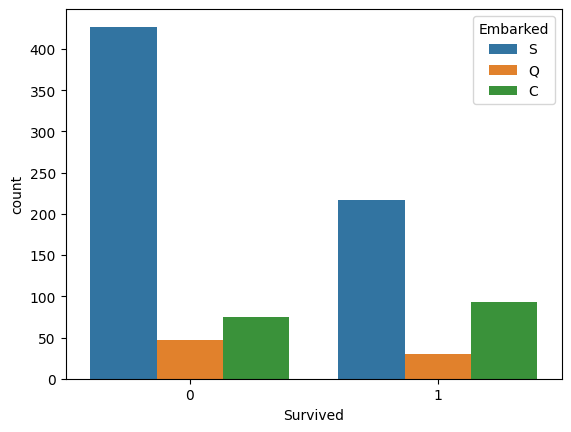

In [22]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [23]:
dummies_embarked = pd.get_dummies (datos["Embarked"], dtype=int, drop_first=True)
datos = datos.join(dummies_embarked)
datos.drop(["Embarked"], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,male,22.000000,1,0,7.2500,1,0,1
1,1,1,female,38.000000,1,0,71.2833,0,0,0
2,1,3,female,26.000000,0,0,7.9250,0,0,1
3,1,1,female,35.000000,1,0,53.1000,0,0,1
4,0,3,male,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,1,0,1
887,1,1,female,19.000000,0,0,30.0000,0,0,1
888,0,3,female,29.699118,1,2,23.4500,0,0,1
889,1,1,male,26.000000,0,0,30.0000,1,0,0


In [26]:

sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

ValueError: could not convert string to float: 'male'